# Wikipedia 
    - 주어진 위키피디아 data를 eda 해봅니다.
    - path : /opt/ml/input/data/wikipedia_documents.json

In [1]:
import json
from pprint import pprint

In [2]:
path = "/opt/ml/input/data/wikipedia_documents.json"

In [3]:
with open(path, "r") as data_json:
    data_dict = json.load(data_json)

In [4]:
print(len(data_dict))

60613


In [5]:
for index, data in enumerate(data_dict.items()):
    pprint(data)
    if index == 5:
        break

('0',
 {'author': None,
  'corpus_source': '위키피디아',
  'document_id': 0,
  'domain': None,
  'html': None,
  'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n'
          '\n'
          '이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n'
          '\n'
          '# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 '
          '여기는 195개 나라를 나열하고 있다.\n'
          '# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 '
          '여기는 11개 나라를 나열하고 있다.\n'
          '\n'
          '두 목록은 모두 가나다 순이다.\n'
          '\n'
          '일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 '
          '수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. '
          '나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
  'title': '나라 목록',
  'url': 'TODO'})
('1',
 {'author': None,
  'corpus_source': '위키피디아',
  'document_id': 1,
  'domain': None,
  'html': None,
  'text': '이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정에 따르면, 국가는 다음의 조건을 '
          '만족해야 한다.\n'
   

## 1. wikipedia 형태
    - 총 60613 documents
    - 아래와 같은 형태

In [23]:
# ('0',
#  {'author': None,
#   'corpus_source': '위키피디아',
#   'document_id': 0,
#   'domain': None,
#   'html': None,
#   'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n'
#           '\n'
#           '이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n'
#           '\n'
#           '# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 '
#           '여기는 195개 나라를 나열하고 있다.\n'
#           '# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 '
#           '여기는 11개 나라를 나열하고 있다.\n'
#           '\n'
#           '두 목록은 모두 가나다 순이다.\n'
#           '\n'
#           '일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 '
#           '수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. '
#           '나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
#   'title': '나라 목록',
#   'url': 'TODO'})

### 1-1. wikipedia 에서 필요한 부분 
        * author : X : None 값, retrieval에서 필요 없음
        * corpus_source : X : '위키피디아' 값, retrieval에서 필요 없음 
        * document_id : O
        * domain : X : None 값, retrieval에서 필요 없음 
        * html : X : None 값, retrieval에서 필요 없음 
        * text : O 
        * title : O : 사용 할수도 있으므로 일단 킵
        * 'url': X : 'TODO'

In [6]:
import pandas as pd
import numpy as np

In [7]:
text_lst = []
title_lst = []
document_id_lst = []

for index, data in enumerate(data_dict.items()):
    document_id = data[0]
    title_data = data[1]['title']
    text_data = data[1]['text']
    
    document_id_lst.append(document_id)
    title_lst.append(len(title_data))
    text_lst.append(len(text_data))

In [8]:
def describe_stats(data_lst):
    data_lst = np.array(data_lst)
    data_lst = pd.DataFrame(data_lst)
    print(data_lst.describe())

In [79]:
print(f'get stats of title')
describe_stats(title_lst)
print('\n')
print(f'get stats of text_lst')
describe_stats(text_lst)

get stats of title
                  0
count  60613.000000
mean       7.801676
std        4.819491
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       96.000000


get stats of text_lst
                  0
count  60613.000000
mean     755.565044
std      762.962671
min      184.000000
25%      414.000000
50%      577.000000
75%      857.000000
max    46099.000000


In [9]:
from matplotlib import pyplot as plt

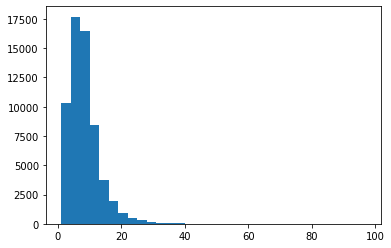

In [18]:
binwidth = 3
plt.hist(title_lst, bins=np.arange(min(title_lst), max(title_lst) + binwidth, binwidth))
plt.show()

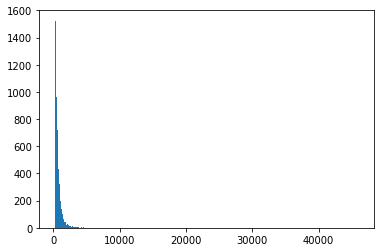

In [20]:
binwidth = 10
plt.hist(text_lst, bins=np.arange(min(text_lst), max(text_lst) + binwidth, binwidth))
plt.show()

### 1-2. text 
    - text 전처리 : 줄바꿈, 공백+2 제거 처리
    - title : strip() 처리

In [32]:
import re

In [65]:
for index, data in enumerate(data_dict.items()):
    print(f'===={index}th document===')
    title_data = data[1]['title']
    print(f'original title :\n{repr(title_data)}')
    print(f'preprocessed title :\n{repr(title_data.strip())}')
    
    text_data = data[1]['text']
    print(f'original text_data \n: {text_data}')
    test_preprocessed = ' '.join(text_data.split('\n'))
    text_preprocessed = re.sub(r"[\s]{2,}", " ", test_preprocessed)
    print(f'preprocessed text_data \n: {text_preprocessed}')
    if index == 5:
        break

====0th document===
original title :
'나라 목록'
preprocessed title :
'나라 목록'
original text_data 
: 이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.

이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.

# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.
# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.

두 목록은 모두 가나다 순이다.

일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.
preprocessed text_data 
: 이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다. 이 목록은 명료화를 위해 두 부분으로 나뉘어 있다. # 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다. # 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다. 두 목록은 모두 가나다 순이다. 일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 

## 2. preprocessing wikipedia.json

In [23]:
import re

In [24]:
from collections import OrderedDict

processed_data_dic = OrderedDict()
text_lst = []
title_lst = []
document_id_lst = []

for index, data in enumerate(data_dict.items()):
    document_id = data[0]
    title_data = data[1]['title']
    text_data = data[1]['text']
    
    p_title_data = title_data.strip()
    p_text_data = ' '.join(text_data.split('\n'))
    p_text_data = re.sub(r"[\s]{2,}", " ", p_text_data)
    
    processed_data_dic[document_id] = {
        "text" : p_text_data,
        "title" : p_title_data
    }

    document_id_lst.append(document_id)
    title_lst.append(len(p_title_data))
    text_lst.append(len(p_text_data))

In [25]:
print(f'get stats of title')
describe_stats(title_lst)
print('\n')
print(f'get stats of text_lst')
describe_stats(text_lst)

get stats of title
                  0
count  60613.000000
mean       7.801676
std        4.819491
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       96.000000


get stats of text_lst
                  0
count  60613.000000
mean     751.431030
std      757.918354
min      184.000000
25%      412.000000
50%      574.000000
75%      853.000000
max    45773.000000


In [26]:
save_path = "/opt/ml/input/data/wikipedia_documents_preprocessed.json"
with open(save_path, "w", encoding='utf8') as json_file:
    json.dump(processed_data_dic, json_file,ensure_ascii = False)